Importaciones:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
original = cv2.imread('img/aurora.png')
blackwhite = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)

In [6]:
# Mostrar imagenes de cv2 con plt
def display(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



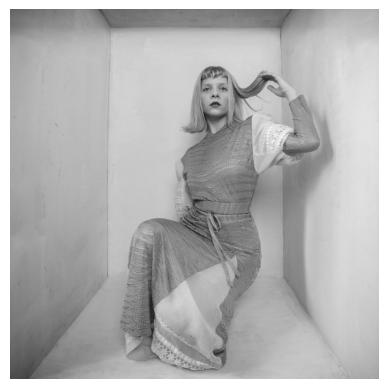

In [7]:
display(blackwhite)

## Implementar una convolución 2D
Implementarla desde cero usando NumPy y aplicando un kernel personalizado a cada pixel.

### Definición de la función

In [9]:
def convolucionar_imagen(imagen, kernel):
    alto, ancho = imagen.shape
    k_alto, k_ancho = kernel.shape
    pad_alto = k_alto // 2
    pad_ancho = k_ancho // 2

    # Crear una imagen de salida del mismo tamaño, inicializada en ceros
    imagen_filtrada = np.zeros_like(imagen)

    # Rellenar la imagen original con ceros en los bordes (padding)
    imagen_padded = np.pad(imagen, ((pad_alto, pad_alto), (pad_ancho, pad_ancho)), mode='constant')

    # Recorrer cada píxel de la imagen original
    for i in range(alto):
        for j in range(ancho):
            # Extraer la región de interés
            region = imagen_padded[i:i + k_alto, j:j + k_ancho]
            # Aplicar el producto punto entre el kernel y la región
            valor = np.sum(region * kernel)
            # Asignar el valor al píxel correspondiente (recortando entre 0-255)
            imagen_filtrada[i, j] = np.clip(valor, 0, 255)

    return imagen_filtrada.astype(np.uint8)


### Ejemplo de uso

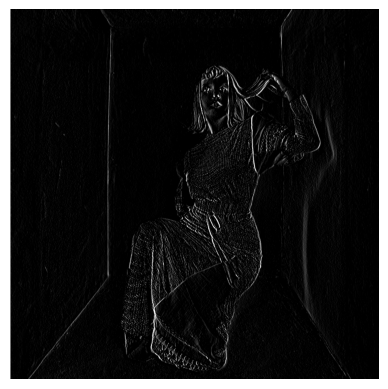

In [11]:
# Definir un kernel para detección de bordes (Sobel horizontal por ejemplo)
kernel_bordes = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

imagen_convolucionada = convolucionar_imagen(blackwhite, kernel_bordes)
display(imagen_convolucionada)

## Kernel de Sharpening (enfoque)

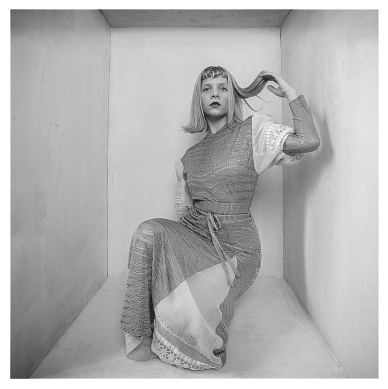

In [12]:
kernel_enfoque = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

imagen_enfocada = convolucionar_imagen(blackwhite, kernel_enfoque)
display(imagen_enfocada)


## Kernel de Blur